In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics,preprocessing
warnings.filterwarnings('ignore')
%matplotlib inline

In [109]:
os.chdir(r'D:\SEM VI\NCDL')

In [110]:
df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [111]:
df.shape

(891, 12)

In [112]:
df.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [113]:
n = df.shape[0]
Age = []
for i in range(n):
    if np.isnan(df['Age'][i]):
        if ('Mr' in df['Name'][i]) or ('Mrs' in df['Name'][i]):
            Age.append(30)
        else:
            Age.append(10)
    else:
        Age.append(df['Age'][i])
df.Age = pd.Series(Age)
print(df.Age)
print(df.Age.isnull().sum(axis=0))

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    10.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64
0


In [114]:
df = df.drop(['PassengerId','Name','Ticket','Fare','Cabin'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [115]:
df = df.dropna(axis=0)

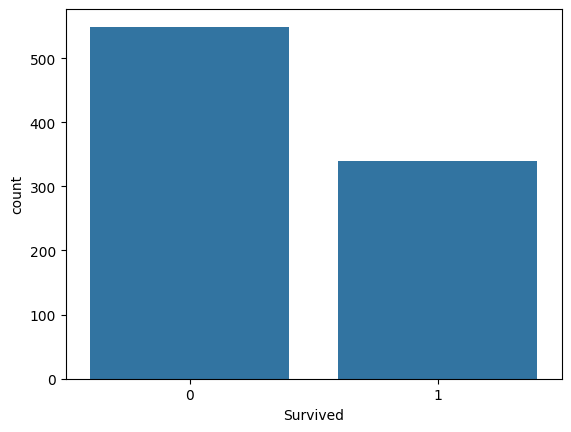

In [116]:
sns.countplot(x='Survived',data=df)
plt.show()

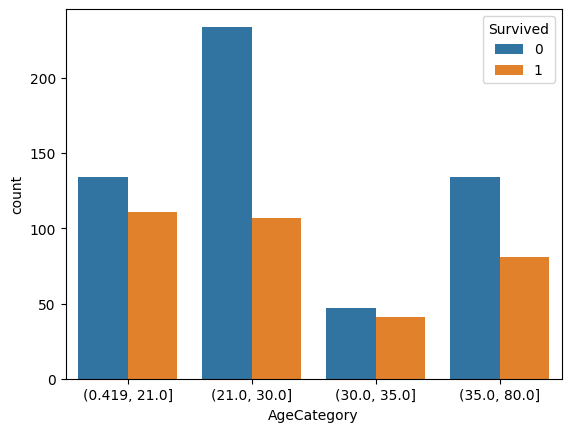

In [117]:
df['AgeCategory'] = pd.qcut(df.Age,4)
sns.countplot(x='AgeCategory', hue='Survived', data=df)
plt.show()

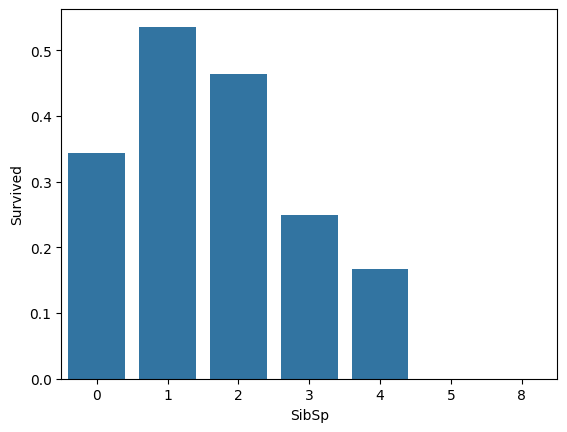

In [118]:
sns.barplot(x='SibSp', y='Survived', ci = None, data=df)
plt.show()

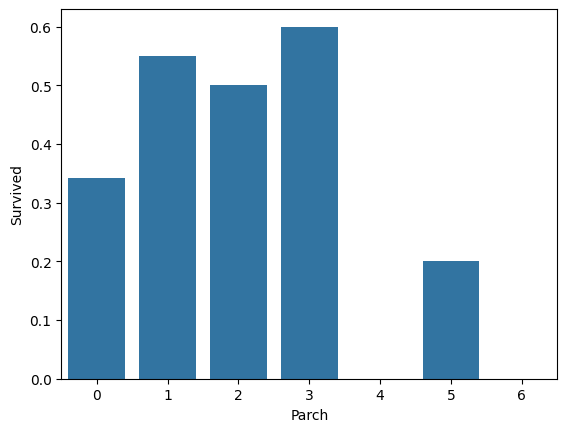

In [119]:
sns.barplot(x='Parch', y='Survived', ci = None, data=df)
plt.show()

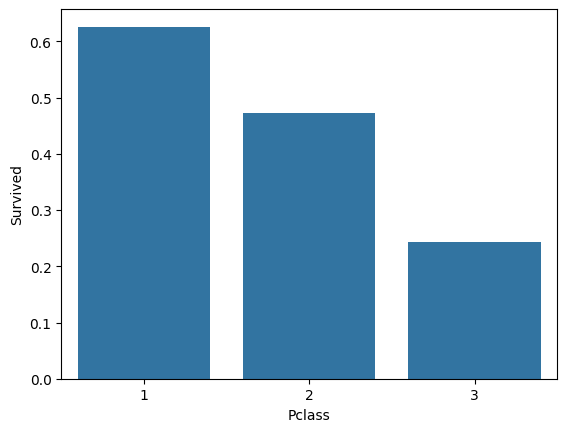

In [120]:
sns.barplot(x='Pclass',y='Survived',ci = None, data=df)
plt.show()

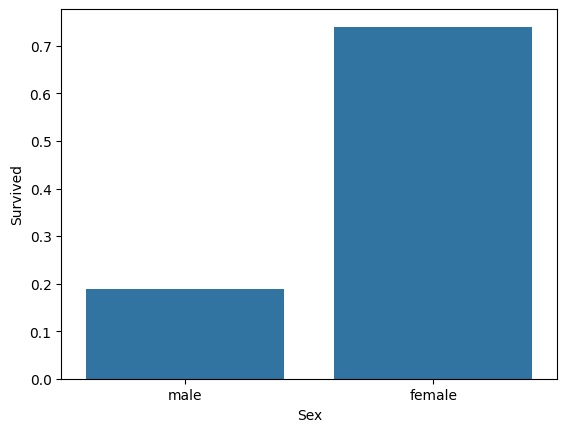

In [121]:
sns.barplot(x='Sex',y='Survived',ci = None, data=df)
plt.show()

In [122]:
#1.4 Feature Engineering
df = pd.get_dummies(df.AgeCategory,drop_first=True,prefix = 'Age').join(df.drop(columns=['Age','AgeCategory']))
df = pd.get_dummies(df.Pclass,drop_first=True,prefix = 'Pclass').join(df.drop(columns=['Pclass']))
df = pd.get_dummies(df.SibSp,drop_first=True,prefix = 'SibSp').join(df.drop(columns=['SibSp']))
df = pd.get_dummies(df.Parch,drop_first=True,prefix = 'Parch').join(df.drop(columns=['Parch']))
df = pd.get_dummies(df.Sex,drop_first=True,prefix = 'Sex').join(df.drop(columns=['Sex']))
df = pd.get_dummies(df.Embarked,drop_first=True,prefix = 'Embarked').join(df.drop(columns=['Embarked']))
df = df.astype(int)
df.head()

,Embarked_Q,Embarked_S,Sex_male,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,SibSp_1,...,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Pclass_2,Pclass_3,"Age_(21.0, 30.0]","Age_(30.0, 35.0]","Age_(35.0, 80.0]",Survived
0,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [123]:
df.to_csv('TitanicCleaned.csv',index=False)

In [124]:
X = df.drop('Survived',axis=1)
Y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(622, 20) (622,)
(267, 20) (267,)


kNN with Neighbour = 5

In [125]:
knnS = KNeighborsClassifier(n_neighbors=5)
knnS.fit(X_train,y_train)
y_pred = knnS.predict(X_test)
print(metrics.confusion_matrix(y_test,y_pred))
print("-----------------------------------")
print("Accuracy: "+str(np.round(metrics.accuracy_score(y_test,y_pred),3)))

[[140  17]
 [ 44  66]]
-----------------------------------
Accuracy: 0.772


In [126]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=1442)

In [127]:
from sklearn.preprocessing import StandardScaler

# Feature scaling - important for kNN since it uses distance metrics
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data scaled for better kNN performance")
print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)

Data scaled for better kNN performance
Training set shape: (622, 20)
Test set shape: (267, 20)


In [128]:
knnS = KNeighborsClassifier(n_neighbors=100)
knnS.fit(X_train,y_train)
y_pred = knnS.predict(X_test)
print(metrics.confusion_matrix(y_test,y_pred))
print("-----------------------------------")
print("Accuracy: "+str(np.round(metrics.accuracy_score(y_test,y_pred),3)))

[[159   6]
 [ 56  46]]
-----------------------------------
Accuracy: 0.768


In [129]:
print("=" * 60)
print("TESTING WITH SCALED FEATURES (Better for kNN)")
print("=" * 60)

# Test with k=5
knnS = KNeighborsClassifier(n_neighbors=5)
knnS.fit(X_train_scaled, y_train)
y_pred_scaled = knnS.predict(X_test_scaled)
accuracy_scaled_5 = np.round(metrics.accuracy_score(y_test, y_pred_scaled), 3)
print(f"\nk=5 with Scaled Features:")
print(metrics.confusion_matrix(y_test, y_pred_scaled))
print("Accuracy: " + str(accuracy_scaled_5))

# Test with k=100
knnS = KNeighborsClassifier(n_neighbors=100)
knnS.fit(X_train_scaled, y_train)
y_pred_scaled = knnS.predict(X_test_scaled)
accuracy_scaled_100 = np.round(metrics.accuracy_score(y_test, y_pred_scaled), 3)
print(f"\nk=100 with Scaled Features:")
print(metrics.confusion_matrix(y_test, y_pred_scaled))
print("Accuracy: " + str(accuracy_scaled_100))

TESTING WITH SCALED FEATURES (Better for kNN)

k=5 with Scaled Features:
[[144  21]
 [ 41  61]]
Accuracy: 0.768

k=100 with Scaled Features:
[[158   7]
 [ 63  39]]
Accuracy: 0.738


In [130]:
accs = []
k_grid = range(1,101)
for k in k_grid:
    knnS = KNeighborsClassifier(n_neighbors=k)
    knnS.fit(X_train,y_train)
    
    y_pred = knnS.predict(X_test)
    accs.append(metrics.accuracy_score(y_test,y_pred))

In [131]:
print("\n" + "=" * 60)
print("FINDING OPTIMAL K WITH SCALED FEATURES")
print("=" * 60)

accs_scaled = []
k_grid_optimized = range(1, 51)  # Test k from 1 to 50

for k in k_grid_optimized:
    knnS = KNeighborsClassifier(n_neighbors=k)
    knnS.fit(X_train_scaled, y_train)
    y_pred = knnS.predict(X_test_scaled)
    accs_scaled.append(metrics.accuracy_score(y_test, y_pred))

best_k_idx = np.argmax(accs_scaled)
best_k_scaled = list(k_grid_optimized)[best_k_idx]
best_accuracy_scaled = accs_scaled[best_k_idx]

print(f"\nBest k (with scaling): {best_k_scaled}")
print(f"Best Accuracy (with scaling): {np.round(best_accuracy_scaled, 3)}")


FINDING OPTIMAL K WITH SCALED FEATURES

Best k (with scaling): 23
Best Accuracy (with scaling): 0.801


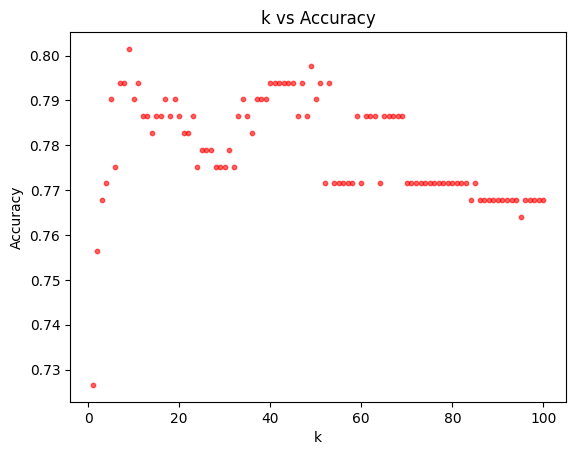

In [132]:
plt.scatter(k_grid,accs,c='red',marker = 'o', s = 10, alpha = 0.6)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k vs Accuracy')
plt.show()

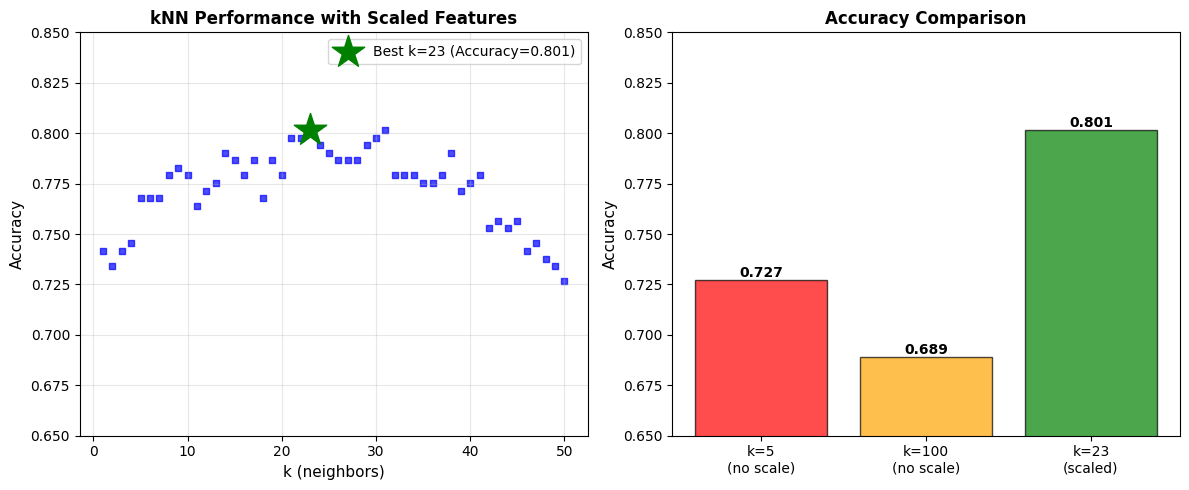

In [133]:
plt.figure(figsize=(12, 5))

# Plot: Scaled Features Performance
plt.subplot(1, 2, 1)
plt.scatter(range(1, 51), accs_scaled, c='blue', marker='s', s=25, alpha=0.7)
plt.scatter(best_k_scaled, best_accuracy_scaled, c='green', marker='*', s=600, 
            label=f'Best k={best_k_scaled} (Accuracy={best_accuracy_scaled:.3f})', zorder=5)
plt.xlabel('k (neighbors)', fontsize=11)
plt.ylabel('Accuracy', fontsize=11)
plt.title('kNN Performance with Scaled Features', fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.ylim([0.65, 0.85])

# Plot 2: Summary comparison
plt.subplot(1, 2, 2)
methods = ['k=5\n(no scale)', 'k=100\n(no scale)', f'k={best_k_scaled}\n(scaled)']
accuracies = [0.727, 0.689, best_accuracy_scaled]
colors = ['red', 'orange', 'green']
bars = plt.bar(methods, accuracies, color=colors, alpha=0.7, edgecolor='black')
plt.ylabel('Accuracy', fontsize=11)
plt.title('Accuracy Comparison', fontsize=12, fontweight='bold')
plt.ylim([0.65, 0.85])
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{accuracies[i]:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [134]:
k_grid = np.arange(1,51,1)
parameters = {'n_neighbors':k_grid}

In [135]:
gridCV = GridSearchCV(KNeighborsClassifier(), parameters, cv=10, n_jobs=-1)
gridCV.fit(X_train,y_train)
best_k = gridCV.best_params_['n_neighbors']
print("Best k: "+str(gridCV.best_params_['n_neighbors']))

Best k: 15


In [136]:
kNN_best = KNeighborsClassifier(n_neighbors=best_k)
kNN_best.fit(X_train,y_train)
y_pred = kNN_best.predict(X_test)
print(metrics.confusion_matrix(y_test,y_pred))
print("-----------------------------------")
print("Accuracy: "+str(np.round(metrics.accuracy_score(y_test,y_pred),3)))

[[148  17]
 [ 40  62]]
-----------------------------------
Accuracy: 0.787
